<a href="https://colab.research.google.com/github/LDBM42/TFM/blob/main/TFM_LuisDavidBetances_EXP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='328534' size="5"><strong>Obtención del dataset </strong></font><font color='Black' size="5">BoBot</font>



#### **Montar Google Drive y Descargar Dataset** 

<font color='Red' size="3"><strong><i>IMPORTANTE: </i></strong></font><font color='Black' size="3"><i>Ejecutar SIEMPRE que se reinicie Google Colab</i></font>

In [ ]:

###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Master_IA/TFM/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import gc # Garbage Collector: para liberar memoria 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_images(path, images_name, start_in):
  """La nomenclatura del nombre de las imagenes debe ser [[ Images_nameNumero_4_digitos.jpg ]]"""
  num = start_in
  x = []
  # Obtener cantidad de archivos en carpeta
  num_files = len(os.listdir(path))

  # Cargar todas las imagenes en orden descendente
  for _ in range(num_files-2): 
    x.append(np.array(Image.open(path + images_name + num + ".jpg")))
    
    if len(str(int(num)+1)) == 1: num = "000" + str(int(num)+1)
    elif len(str(int(num)+1)) == 2: num = "00" + str(int(num)+1)
    elif len(str(int(num)+1)) == 3: num = "0" + str(int(num)+1)
    elif len(str(int(num)+1)) == 4: num = str(int(num)+1)

  # devolver lista como numpy array
  return np.array(x)



# Cargar imagenes
X1 = load_images(BASE_FOLDER+"person/", "person", "0000")
X2 = load_images(BASE_FOLDER+"Vid_E_person_part_occluded/", "img", "0002")
X3 = load_images(BASE_FOLDER+"Vid_F_person_fully_occluded/", "img", "0002")
# X4 = load_images(BASE_FOLDER+"Vid_I_person_crossing/", "img", "0002")
X5 = load_images(BASE_FOLDER+"Vid_D_person/", "img", "0002")


In [ ]:
print(X1.shape)
print(X2.shape)
print(X3.shape)
# print(X4.shape)
print(X5.shape)

(331, 240, 320, 3)
(305, 240, 320, 3)
(453, 240, 320, 3)
(947, 240, 320, 3)


In [ ]:
# Concatenar todos los datos
# X = np.concatenate((X1, X2, X3, X4, X5), axis=0)
X = np.concatenate((X1, X2, X3, X5), axis=0)

In [ ]:
X.shape

(2036, 240, 320, 3)

In [ ]:
# cargar groundtruth
y1 = np.array(pd.read_table(BASE_FOLDER+"person/groundtruth.txt" ,sep=','))
y2 = np.array(pd.read_table(BASE_FOLDER+"Vid_E_person_part_occluded/groundtruth.txt" ,sep=','))
y3 = np.array(pd.read_table(BASE_FOLDER+"Vid_F_person_fully_occluded/groundtruth.txt" ,sep=','))
# y4 = np.array(pd.read_table(BASE_FOLDER+"Vid_I_person_crossing/groundtruth.txt" ,sep=','))
y5 = np.array(pd.read_table(BASE_FOLDER+"Vid_D_person/groundtruth.txt" ,sep=','))

In [ ]:
# Concatenar todos los groundtruth
# y = np.concatenate((y1, y2, y3, y4, y5), axis=0)
y = np.concatenate((y1, y2, y3, y5), axis=0)

In [ ]:
# Revisar dimensiones del dataset
print(np.shape(X))
print(np.shape(y))

(2036, 240, 320, 3)
(2036, 4)


In [ ]:
# alto y ancho de la imagen
H, W = np.shape(X)[1:3]
print("W=" + str(W), "H=" + str(H))

W=320 H=240


In [ ]:
# colocar imagen cuadrada
del_from_each_side = int((W-H)/2) # calcular cuanto quitar de cada lado


y1, x1 = 0, del_from_each_side
y2, x2 = X.shape[1], X.shape[2]-del_from_each_side-1
X_temp = []


print("Antes:", X.shape)

for i in range(X.shape[0]):
  X_temp.append(X[i][y1:(y2 + 1), x1:(x2 + 1)])


X = np.array(X_temp)
del X_temp

print("Después:", X.shape)

Antes: (2036, 240, 320, 3)
Después: (2036, 240, 240, 3)


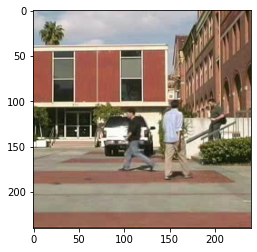

In [ ]:
plt.imshow(X[10])
plt.show()

In [ ]:
#Almacenar groundtruth en variables separadas y redimensionar entre 0 y 1
x, y_, w, h = ((y[:,0]/W)-(del_from_each_side/W)), y[:,1]/H, y[:,2]/W, y[:,3]/H

In [ ]:
# Estructura del groundtruth
print("X=" + str(x[0]) + "\nY=" + str(y_[0]) + "\nW=" + str(w[0]) + "\nH=" + str(h[0]))

X=0.396875
Y=0.4166666666666667
W=0.090625
H=0.3541666666666667


In [ ]:
# Cambiar imagen a un Rango de valores entre 0 y 1
X = X/255
X = np.float32(X)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


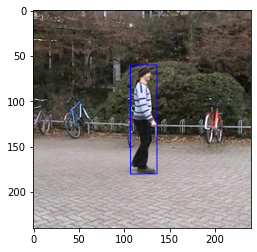

In [ ]:
import cv2

# mostrar imagen random con su bounding box
num = np.random.randint(0,X.shape[0])
img = X[num]
img2 = img.copy()

x_temp, y_temp, w_temp, h_temp = int(x[num]*W), int(y_[num]*H), int(w[num]*W), int(h[num]*H) 
pt1= x_temp, y_temp
pt2= x_temp+w_temp, y_temp+h_temp 

cv2.rectangle(img2, pt1=pt1, pt2=pt2, color=(0,0,255), thickness=1)

plt.imshow(img2)
plt.show()

In [ ]:
#Colocar el groundtruth nuevamente en una sola variable
y=[]
for i in range(x.shape[0]):
  y.append([x[i], y_[i], w[i], h[i]])

y = np.array(y)

# imprimir dimensiones
y.shape

(2036, 4)

**Inspeccionando el conjunto de datos**


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


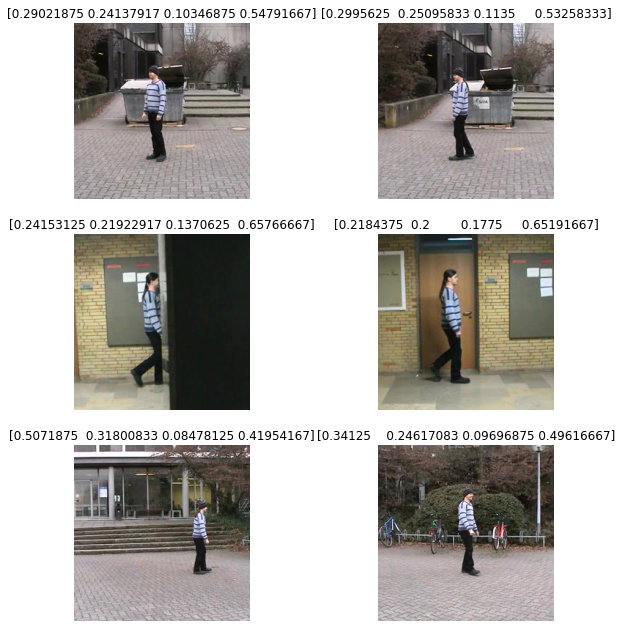

In [ ]:
fig = plt.figure(figsize=(10,11))

# indices de los subplots
index = np.arange(1, 7)
i = 0

# plotear 8 imagenes aleatorias del dataset, con sus etiquetas
for n in np.random.randint(0, len(y), 6): 
    fig.add_subplot(3, 2, index[i])
    
    img = X[n]
    plt.imshow(img)
    label = y[n]
    plt.title(label)
    plt.axis('off')
    
    i += 1 # aumentar indice


## <font color='328534' size="5"><strong>Arquitectura MOBILENET</strong></font>
---
<img src='https://drive.google.com/uc?export=view&id=1y-cepqHzXXu5KkTlGNexs5MnvzmshZTW' width=700px>

---

### <font color='6FBC71' size="4"><strong>-------------TRANSFER LEARNING-------------MOBILENET</strong></font>

---



In [ ]:

from tensorflow.keras.applications import mobilenet
from sklearn.model_selection import train_test_split

# dividir en datos de entrenamiendo, test y validación
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=20) # 20% para datos de test
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.1, random_state=10)  # 10% para validación

# # preprocesando los datos como ImageNet
x_tr = mobilenet.preprocess_input(x_tr*255)                                            # Datos de train preprocesados como MobileNet
x_te = mobilenet.preprocess_input(x_te*255)                                            # Datos de test preprocesados
x_val = mobilenet.preprocess_input(x_val*255)                                            # Datos de test preprocesados

In [ ]:
# guardar datos de prueba para usar en cualquier momento
np.save(BASE_FOLDER+"img_test_4_datasets.npy", x_te)

In [ ]:

print('x train:', x_tr.shape)
print('y train:', y_tr.shape, '\n')

print('x test: ', x_te.shape)
print('y test: ', y_te.shape, '\n')


x train: (1465, 240, 240, 3)
y train: (1465, 4) 

x test:  (408, 240, 240, 3)
y test:  (408, 4) 



**Cargando la topología de CNN (base model)**

In [ ]:

from tensorflow.keras.applications import MobileNet # Importamos modelo pre-entrenado MobileNet

input_shape = x_tr[0, :, :, :].shape                # Dimensiones de los datos de entrada

base_model = MobileNet(weights='imagenet',          # Traemos los pesos de imagenet
                       include_top=False,           # No incluir el top model
                       input_shape=input_shape,     # Se incluye el nuevo input shape
                       pooling='max')               # Se le aplica un global max pooling

base_model.summary()


17227776/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 120, 120, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 120, 120, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 120, 120, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 120, 120, 32)      128       
_________________________________________________

**Creando el Top Model y realizamos el TRANSFER LEARNING**

En esta ocasion utilizaré el Functional API para crear el modelo.

In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

base_model.trainable = False # Congelamos las capas Conv2D

inputs = Input(shape=input_shape)

## BASE MODEL PREENTRENADO ##
# training=False es para que las capas de BatchNormalization se mantengan en modo de inferencia
# esto sirve para que al realizar el fine tuning (el proximo paso) sobre este modelo preentrenado, 
# los nuevos updates de los pesos no destruyan lo que el modelo aprenda en este paso (Transfer Learning)
# https://www.tensorflow.org/guide/keras/transfer_learning
tlm = base_model(inputs, training=False)

## TOP MODEL ##
tlm = Dense(512, activation='relu')(tlm)  # 512 neuronas debido a que la salida del base model con el 'global_max_pooling2d'  es 1024
tlm = Dense(256, activation='relu')(tlm)
tlm = Dense(128, activation='relu')(tlm)
tlm = Dense(32, activation='relu')(tlm)
outputs = Dense(4, activation='sigmoid')(tlm)

transfer_learning_model = Model(inputs=inputs, outputs=outputs)

transfer_learning_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132   

**Funcion Auxiliar**

In [ ]:

import gc # Garbage Collector: para liberar memoria 
from tensorflow.keras.callbacks import Callback

# Callback personalizado para incluir en la lista de callbacks mientras entrenamos el modelo
# Este libera memoria al finalizar cada epoch
class GarbageCollectorCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect() # liberar memoria con garbage collector
        

**Entrenando el modelo**

In [ ]:

# Importamos los paquetes necesarios
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from google.colab import drive


In [ ]:
lr = 1e-4
epochs = 20
batch_size = 32


# Compilar el modelo
transfer_learning_model.compile(loss="mse", optimizer=Adam(lr)) 

# Entrenamiento de la CNN
# Se detendrá el entrenamiento cuando no haya mejoras en el loss validation por 5 epochs consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

print("[INFO]: Entrenando la CNN...\n")
H_TRANSFER_LEARNING = transfer_learning_model.fit(x_tr, y_tr, validation_data=(x_val, y_val), batch_size=batch_size, 
                                                  epochs=epochs, callbacks=[GarbageCollectorCallback(), early_stopping], verbose=1)


[INFO]: Entrenando la CNN...

Epoch 1/50
46/46 [==============================] - 36s 69ms/step - loss: nan - val_loss: nan
Epoch 2/50
46/46 [==============================] - 2s 46ms/step - loss: nan - val_loss: nan
Epoch 3/50
46/46 [==============================] - 2s 46ms/step - loss: nan - val_loss: nan
Epoch 4/50
46/46 [==============================] - 2s 46ms/step - loss: nan - val_loss: nan
Epoch 5/50
46/46 [==============================] - 2s 46ms/step - loss: nan - val_loss: nan
